In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [3]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
  samples = np.random.choice(x,size=(sample_size , n_bootstraps) , replace = True)
  data_mean = np.mean(data)
  mean = np.mean(samples , axis=0)
  lower = np.percentile(mean,2.5)
  upper = np.percentile(mean ,97.5)
  
  return data_mean, lower, upper


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

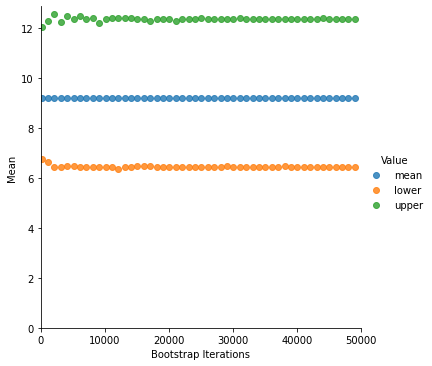

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [5]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  samples = np.random.choice(sample,size=(sample_size , n_bootstraps) , replace = True)
  data_mean = np.mean(data)
  mean = np.mean(samples , axis=0)
  alpha = 100 - ci
  lower_alpha = (alpha/2)
  upper_alpha = ci + (alpha/2)
  lower = np.percentile(mean,lower_alpha)
  upper = np.percentile(mean ,upper_alpha)
	
  
  return data_mean, lower, upper

In [ ]:
data.shape[0]

14

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

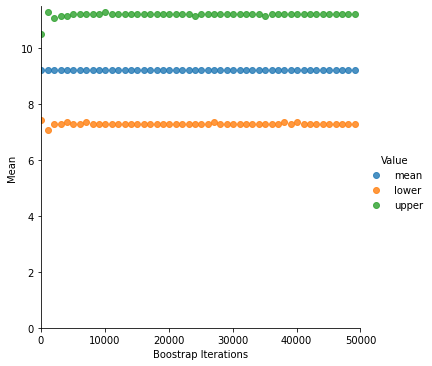

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [10]:
# Load and visualise the vehicles dataset

# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")

df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv" , delimiter = ",")
df.head()



# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0


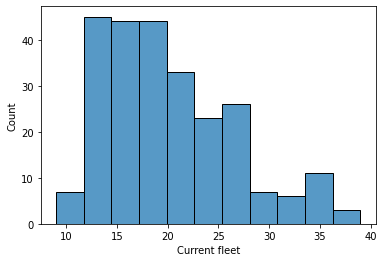

In [ ]:
new_fleet_plot = sns.histplot(df , x="Current fleet" )
new_fleet_plot


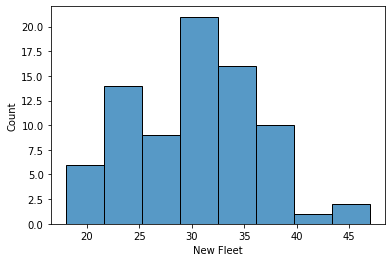

In [ ]:
old_fleet_plot = sns.histplot(df , x="New Fleet")
old_fleet_plot

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [ ]:
df.isna().sum()

Current fleet      0
New Fleet        170
dtype: int64

In [11]:
#there are na's present in the new fleet coloumns, hence dropping them
df = df.dropna()

In [12]:
#getting mean of values
current_data = df.values.T[0]
current_mean = np.mean(current_data)
current_mean



16.025316455696203

In [49]:
new_data = df.values.T[1]
new_mean= np.mean(new_data)
new_mean

30.481012658227847

In [31]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    
    #concat both arrays
    s1_mean = np.mean(sample1)
    s2_mean = np.mean(sample2)
    t_obs = s2_mean - s1_mean

    #concat
    concat = np.concatenate((sample1 , sample2))

    count = 0
    for i in range(n_permutations):
      perm = np.random.permutation(concat)
      #split
      pold = perm[:int(len(perm)/2)]
      pnew = perm[int(len(perm)/2):]
      pold_mean = np.mean(pold)
      pnew_mean = np.mean(pnew)
      t_perm = pnew_mean - pold_mean
      if t_perm > t_obs:
        count += 1

    p_value = count/n_permutations
    
    return p_value

## Voting dataset

##### The voting dataset seemed inaccessible, hence just took the values into lists, as the data was small.

In [24]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]

In [ ]:
len(dem_share_PA)

67

In [25]:
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [ ]:
len(dem_share_OH)

88

# Quiz works


In [ ]:
permut_test(current_data , new_data , 30000)

0.0

In [38]:
#confidence interval 
bootstrap_mean_ci(data , data.shape[0], 10000 , 95)

(9.214285714285714, 6.498214285714288, 12.357142857142858)

# Bootstrap function for quiz questions (rough work)

###### Bootstrap to find c.i of mean for new and old fleets from vehicles dataset

In [50]:
def bootstrap_mean_ci_new(sample, sample_size, n_bootstraps, ci):
  samples = np.random.choice(sample,size=(sample_size , n_bootstraps) , replace = True)
  data_mean = np.mean(new_data)
  mean = np.mean(samples , axis=0)
  alpha = 100 - ci
  lower_alpha = (alpha/2)
  upper_alpha = ci + (alpha/2)
  lower = np.percentile(mean,lower_alpha)
  upper = np.percentile(mean ,upper_alpha)
	
  
  return data_mean, lower, upper

In [52]:
bootstrap_mean_ci_new(new_data , new_data.shape[0] , 10000 ,60)

(30.481012658227847, 29.89873417721519, 31.050632911392405)

In [48]:
def bootstrap_mean_ci_old(sample, sample_size, n_bootstraps, ci):
  samples = np.random.choice(sample,size=(sample_size , n_bootstraps) , replace = True)
  data_mean = np.mean(current_data)
  mean = np.mean(samples , axis=0)
  alpha = 100 - ci
  lower_alpha = (alpha/2)
  upper_alpha = ci + (alpha/2)
  lower = np.percentile(mean,lower_alpha)
  upper = np.percentile(mean ,upper_alpha)
	
  
  return data_mean, lower, upper

In [53]:
bootstrap_mean_ci_old(current_data , current_data.shape[0] , 10000 , 80)

(16.025316455696203, 15.417721518987342, 16.632911392405063)

###### Bootstrap function to finc c.i of mean for voting data

In [57]:
def bootstrap_mean_ci_PA(sample, sample_size, n_bootstraps, ci):
  samples = np.random.choice(sample,size=(sample_size , n_bootstraps) , replace = True)
  data_mean = np.mean(dem_share_PA)
  mean = np.mean(samples , axis=0)
  alpha = 100 - ci
  lower_alpha = (alpha/2)
  upper_alpha = ci + (alpha/2)
  lower = np.percentile(mean,lower_alpha)
  upper = np.percentile(mean ,upper_alpha)
	
  
  return data_mean, lower, upper

In [59]:
bootstrap_mean_ci_OH(dem_share_OH , len(dem_share_OH) , 25000, 90)

(44.31818181818182, 42.5989715909091, 46.05843181818183)

### Bootstrap function to find standard deviation

In [6]:
def bootstrap_cisd(sample, sample_size , n_bootstraps , ci):
  boot_sd = []
  bootstrap = np.random.choice(sample , (n_bootstraps, sample_size))
  data_sd= np.std(data)
  for boot in bootstrap:
    boot_sd.append(np.std(boot))
  alpha = (100- ci)
  lower_alpha = (alpha/2)
  upper_alpha = ci + (alpha/2)
  lower = np.percentile(boot_sd , lower_alpha)
  upper = np.percentile(boot_sd , upper_alpha)
  
  return data_sd , lower , upper

In [55]:
bootstrap_cisd(data, data.shape[0] , 10000 , 95)

(5.684296305594556, 2.7562544830821056, 7.352980792210206)

### Bootstrap functions to find standard deviation c.i for vehincles dataset

In [34]:
def bootstrap_cisd_veh_old(sample, sample_size , n_bootstraps , ci):
  boot_sd = []
  bootstrap = np.random.choice(sample , (n_bootstraps, sample_size))
  data_sd= np.std(current_data)
  for boot in bootstrap:
    boot_sd.append(np.std(boot))
  alpha = (100- ci)
  lower_alpha = (alpha/2)
  upper_alpha = ci + (alpha/2)
  lower = np.percentile(boot_sd , lower_alpha)
  upper = np.percentile(boot_sd , upper_alpha)
  
  return data_sd , lower , upper

In [40]:
bootstrap_cisd_veh_old(current_data , current_data.shape[0] , 10000 ,73)

(4.170343407965598, 3.7131044519022236, 4.538217425494015)

In [54]:
bootstrap_cisd_veh_old(current_data , current_data.shape[0] , 10000 , 99)

(4.170343407965598, 3.1173697103860127, 5.052617524674701)

In [33]:
def bootstrap_cisd_veh_new(sample, sample_size , n_bootstraps , ci):
  boot_sd = []
  bootstrap = np.random.choice(sample , (n_bootstraps, sample_size))
  data_sd= np.std(new_data)
  for boot in bootstrap:
    boot_sd.append(np.std(boot))
  alpha = (100- ci)
  lower_alpha = (alpha/2)
  upper_alpha = ci + (alpha/2)
  lower = np.percentile(boot_sd , lower_alpha)
  upper = np.percentile(boot_sd , upper_alpha)
  
  return data_sd , lower , upper

In [39]:
bootstrap_cisd_veh_new(new_data , new_data.shape[0] , 10000 , 99)

(6.068930545150857, 4.860555770326324, 7.187537282908072)

### permutation of voting dataset

In [61]:
permut_test(dem_share_OH , dem_share_PA , 20000)

0.236